In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style='whitegrid')
%matplotlib inline

In [33]:
df= pd.read_csv('diamonds.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

FileNotFoundError: [Errno 2] File diamonds.csv does not exist: 'diamonds.csv'

### Information about our data

In [3]:
#J is worst, D is best
print(df.color.unique())

#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
print(df.clarity.unique())

#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
print(df.cut.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


## EDA of Dependent Variable and Categorical Features

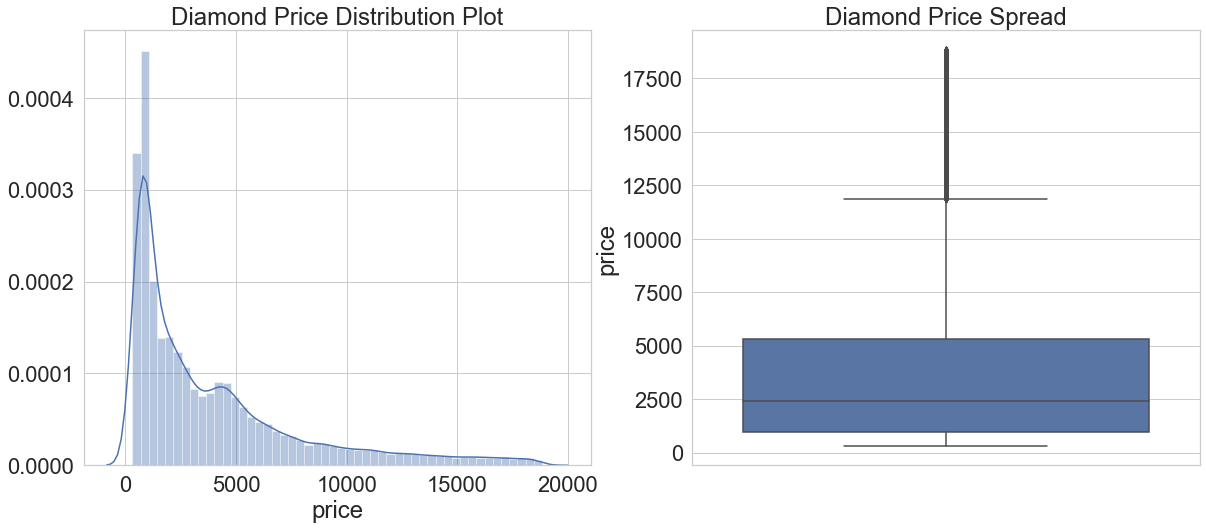

In [4]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diamond Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Diamond Price Spread')
sns.boxplot(y=df.price)

plt.show()

*Inferences*:
- the price is right skewed
- most of the data is between 1000-5100 USD

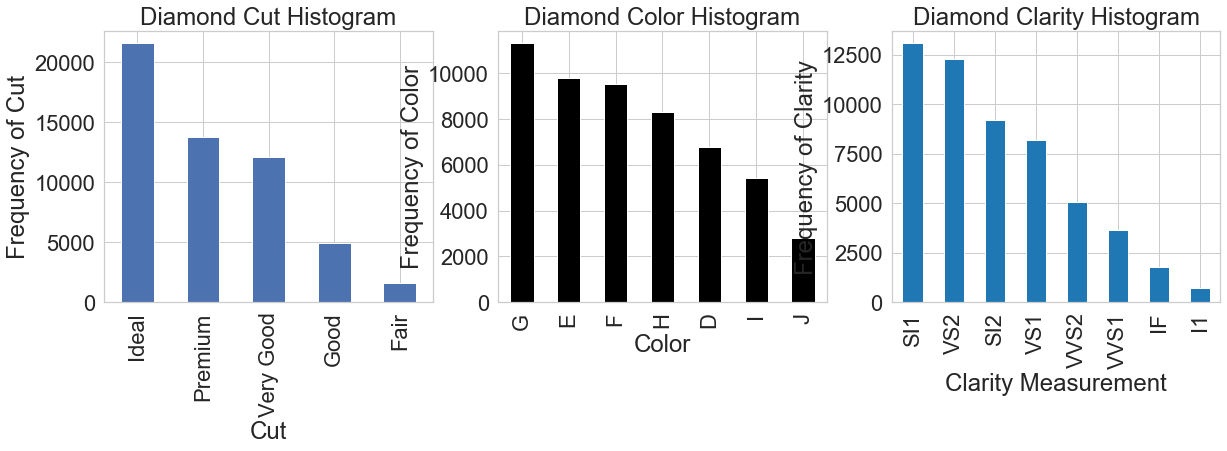

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt1 = df.cut.value_counts().plot(kind='bar')
plt.title('Diamond Cut Histogram')
plt1.set(xlabel = 'Cut', ylabel='Frequency of Cut')

plt.subplot(1,3,2)
plt1 = df.color.value_counts().plot(kind='bar', color='black')
plt.title('Diamond Color Histogram')
plt1.set(xlabel = 'Color', ylabel='Frequency of Color')


plt.subplot(1,3,3)
plt1 = df.clarity.value_counts().plot(kind='bar', color='tab:blue')
plt.title('Diamond Clarity Histogram')
plt1.set(xlabel = 'Clarity Measurement', ylabel='Frequency of Clarity')


plt.show()

## Plotting Correlation and Dropping Highly Correlated Variables

In [6]:
data_pred = df.drop(columns='price')

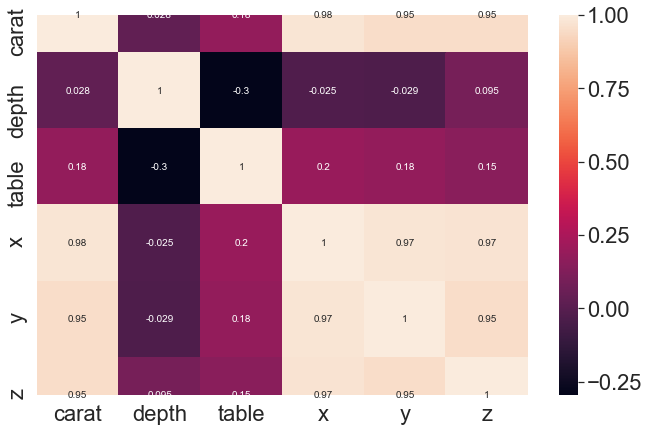

In [7]:
# which variables are highly correlated that need to be removed?
plt.figure(figsize=(11,7))
sns.heatmap(data_pred.corr(), annot=True);

In [8]:
# check which variables are correleated over 0.75 to drop
abs(data_pred.corr()) > 0.75

,carat,depth,table,x,y,z
carat,True,False,False,True,True,True
depth,False,True,False,False,False,False
table,False,False,True,False,False,False
x,True,False,False,True,True,True
y,True,False,False,True,True,True
z,True,False,False,True,True,True


In [9]:
# we drop these columns because their correlation is above .75. We keep the carat variable
df = df.drop(columns=['x','y','z'])

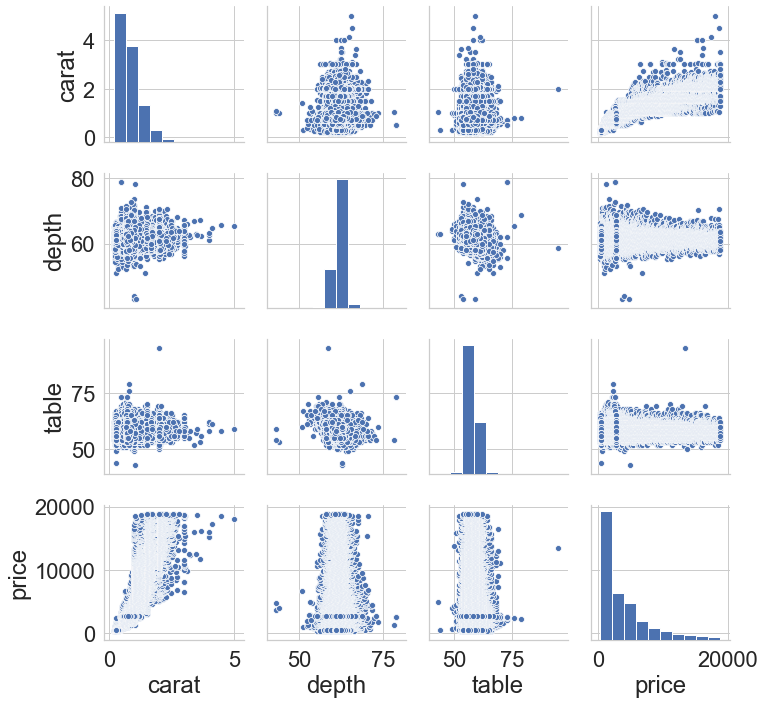

In [10]:
#plot out pairplot to see our variables against each other

sns.pairplot(df)
plt.show()

In [11]:
# dropping price outliers
top_q = df['price'].quantile(.975)
bottom_q = df['price'].quantile(.025)

df = df[df['price'] < top_q]
df = df[df['price'] > bottom_q]
df['price'].describe()

count    51225.000000
mean      3678.817940
std       3430.046446
min        479.000000
25%        984.000000
50%       2401.000000
75%       5147.000000
max      15618.000000
Name: price, dtype: float64

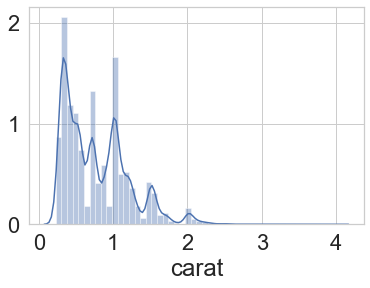

In [12]:
sns.distributions.distplot(df.carat)

In [13]:
# dropping price outliers
top_q = df['carat'].quantile(.99)
bottom_q = df['carat'].quantile(.01)

df = df[df['carat'] < top_q]
df = df[df['carat'] > bottom_q]
df['carat'].describe()

count    50035.00000
mean         0.77102
std          0.40631
min          0.27000
25%          0.41000
50%          0.70000
75%          1.02000
max          2.04000
Name: carat, dtype: float64

In [14]:
df= pd.read_csv('diamonds.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Hypothesis Test 1 - Carat Weight
Null Hypothesis : There is no significant difference between the price of diamonds of weights 1.9-2 and weights 2-2.1.<br>
Alternate Hypothesis : There is a significant difference between the price of diamonds of weights 1.9-2 and weights 2-2.1.<br>
Alpha value = 0.05

In [212]:
#create df with only carat weights btw 2 and 3
df_car1p9 = df[(df.carat >=1.9) & (df.carat<2)]

In [213]:
#create df with only carat weights btw 3 and 4
df_car2 = df[(df.carat >=2) & (df.carat<2.1)]

In [202]:
from statsmodels.stats import weightstats as stests

In [214]:
#two-tailed z_test for two carat weight groups
ztest ,pval1 = stests.ztest(df_car1p9.price, x2=df_car2.price, alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0008498647943992758
reject null hypothesis


#### P-value is less than our alpha value of 0.05, therefore:
- Reject the null hypothesis meaning there is a statistically significant difference between the prices of diamonds weighted 1.9-2 and weights 2-2.1.

#### Inference:
- Carat weight is the most critical predictor of price, it appears that the weight of 2 is a significant point where the value rises.

### Hypothesis Test 2
Null Hypothesis : There is no significant difference between the price of diamonds with the best cut and diamonds with the best clarity.<br>
Alternate Hypothesis : There is a significant difference between the price of diamonds with the best cut and diamonds with the best clarity.<br>
Alpha value = 0.05

In [215]:
#create df with only best cut diamonds
df_best_cut = df[(df.cut == 'Ideal')]

In [221]:
df_best_cut.price.mean()

3457.541970210199

In [217]:
#create df with only best clarity diamonds
df_best_clar = df[(df.clarity == 'IF')]

In [220]:
df_best_clar.price.mean()

2864.839106145251

In [219]:
#two-tailed z_test for two diamond
ztest ,pval1 = stests.ztest(df_best_cut.price, x2=df_best_clar.price, alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.744688067675461e-10
reject null hypothesis


#### P-value is less than our alpha value of 0.05, therefore:
- Reject the null hypothesis meaning there is a statistically significant difference between the prices of diamonds with the best cut and diamonds with the best clarity.

#### Inference:
The best cut diamonds have a higher price on average and are more valuable than diamonds with the best clarity.